**CUSTOMER CHURN PREDICTION**




 The dataset was taken from the website:

https://www.kaggle.com/zagarsuren/telecom-churn-dataset-ibm-watson-analytics/code

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [6]:
df = pd.read_csv("customer_churn_analysis.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cleaning

In [8]:
data1 = df.copy()
data1.TotalCharges = pd.to_numeric(data1.TotalCharges, errors='coerce')
data1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data1.loc[data1 ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
data1.TotalCharges = data1.TotalCharges.fillna(data1.TotalCharges.interpolate())
#data1 for having tenure values instead of groups

In [11]:
print(data1['tenure'].max())
data = data1.copy()

72


In [12]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [13]:
data['tenure_group'].value_counts()
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [14]:
#exploration

In [15]:
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [16]:
churn_value_count = pd.DataFrame(100*df['Churn'].value_counts()/len(df['Churn']))
# churn_value_count.reset_index().set_axis(['churn','value'], axis=1, inplace=True)
churn_value_count.reset_index().set_axis(['churn','value'], axis=1)
churn_value_count

,count
Churn,
No,73.463013
Yes,26.536987


[(0.5725490196078431, 0.5725490196078431, 1.0), (1.0, 0.5725490196078431, 0.5725490196078431)]


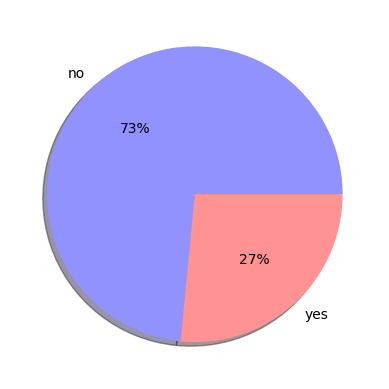

In [17]:
colors = sns.color_palette('bwr')[1:2]
colors.append((sns.color_palette('bwr')[4]))
plt.pie(np.ravel(churn_value_count), labels = ["no","yes"], colors = colors, autopct='%.0f%%',shadow=True)
print(colors)

<ipython-input-18-d18d8bc74449>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = data1.Churn, y = data1.tenure, palette='bwr')


<Axes: xlabel='Churn', ylabel='tenure'>

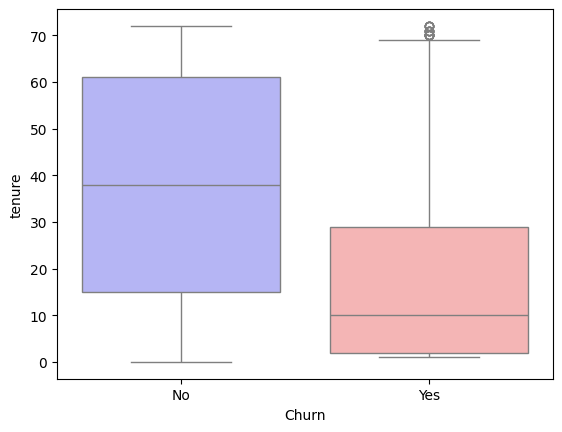

In [18]:
sns.boxplot(x = data1.Churn, y = data1.tenure, palette='bwr')

<ipython-input-19-e31ee64bbbca>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == "No") ],
<ipython-input-19-e31ee64bbbca>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == "Yes") ],


Text(0.5, 1.0, 'Monthly charges by churn')

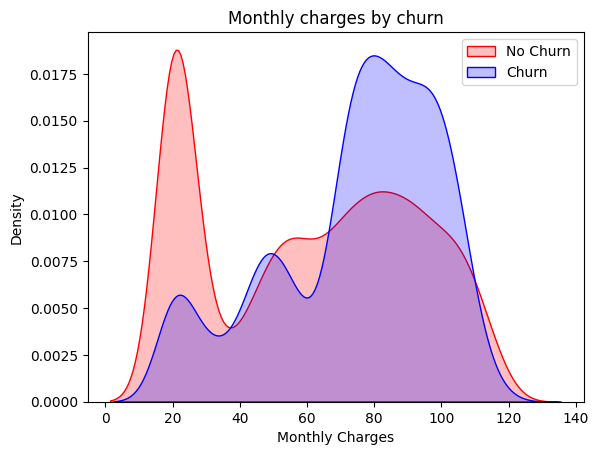

In [19]:
Mth = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == "No") ],
                color="Red", shade = True)
Mth = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == "Yes") ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


<ipython-input-20-6420764085d9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data.TotalCharges[(data["Churn"] == "No") ],
<ipython-input-20-6420764085d9>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data.TotalCharges[(data["Churn"] == "Yes") ],


Text(0.5, 1.0, 'Total charges by churn')

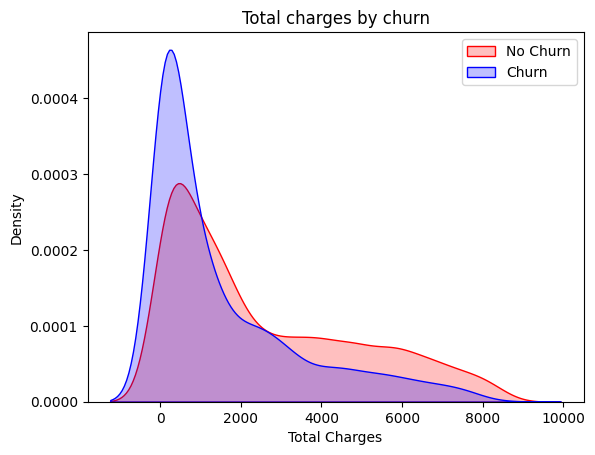

In [20]:
Tot = sns.kdeplot(data.TotalCharges[(data["Churn"] == "No") ],
                color="Red", shade = True)
Tot = sns.kdeplot(data.TotalCharges[(data["Churn"] == "Yes") ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<ipython-input-21-0a5de0f84780>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "No") ],
<ipython-input-21-0a5de0f84780>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "Yes") ],


Text(0.5, 1.0, 'Total charges by churn')

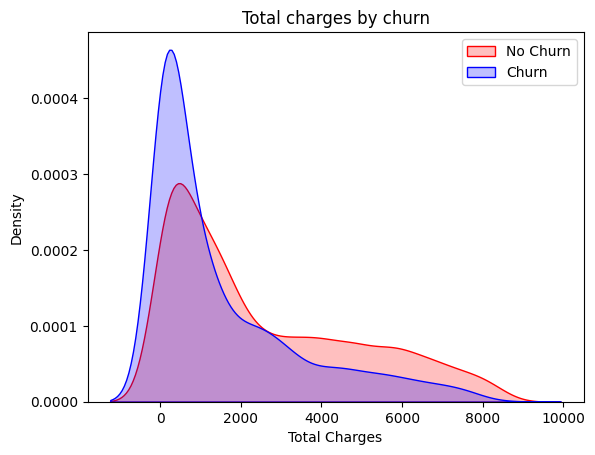

In [21]:
Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "No") ],
                color="Red", shade = True)
Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "Yes") ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

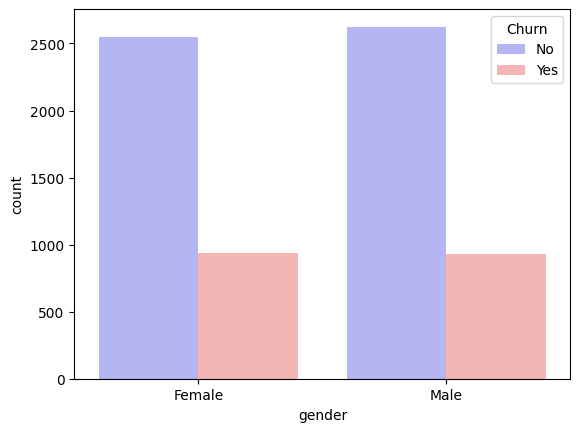

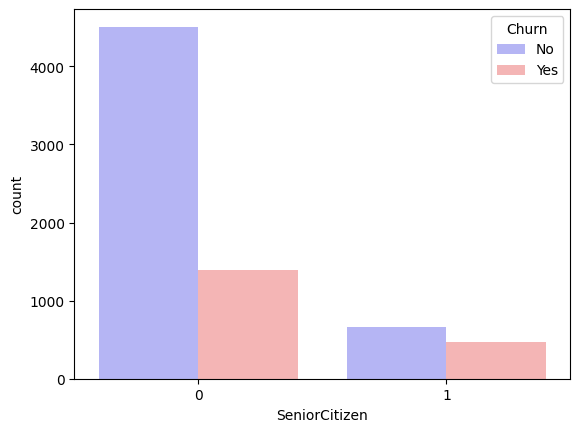

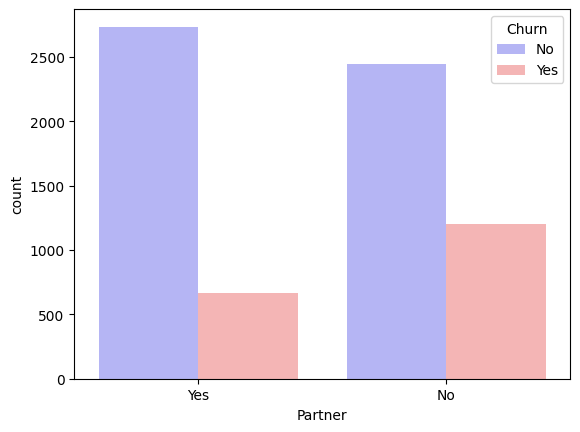

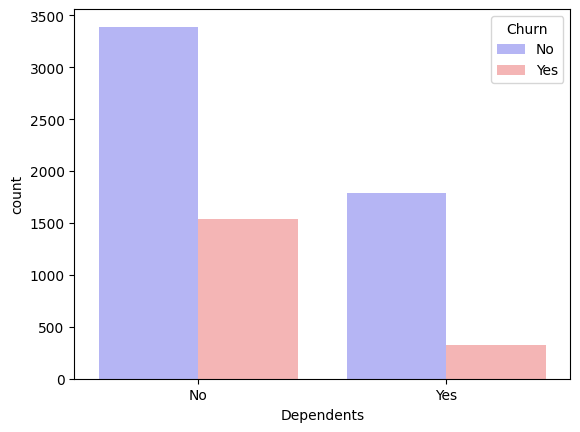

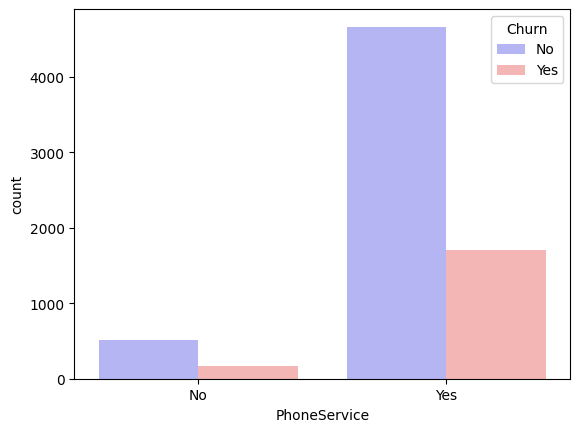

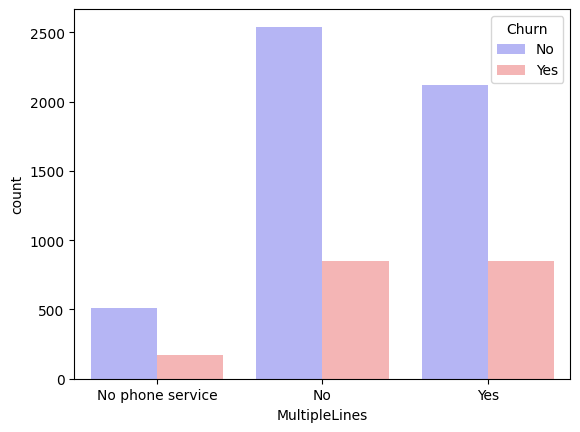

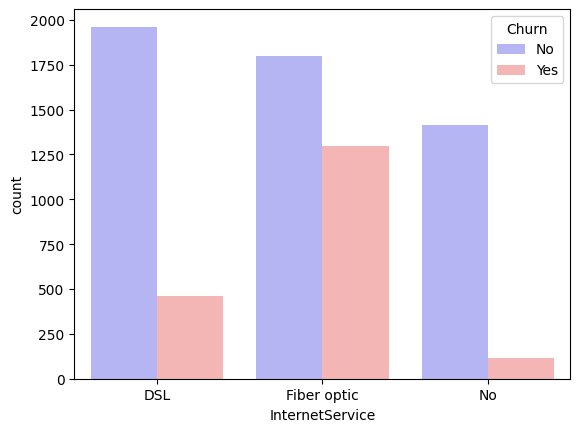

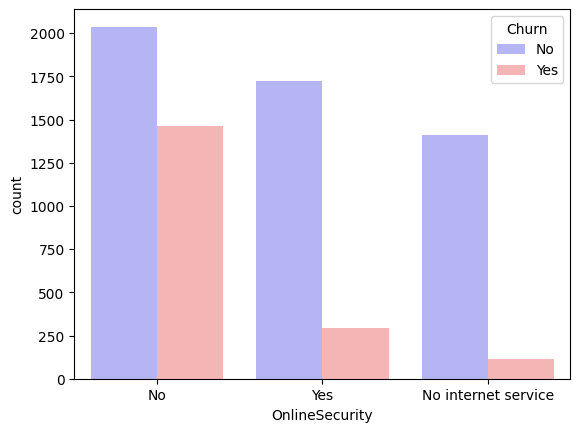

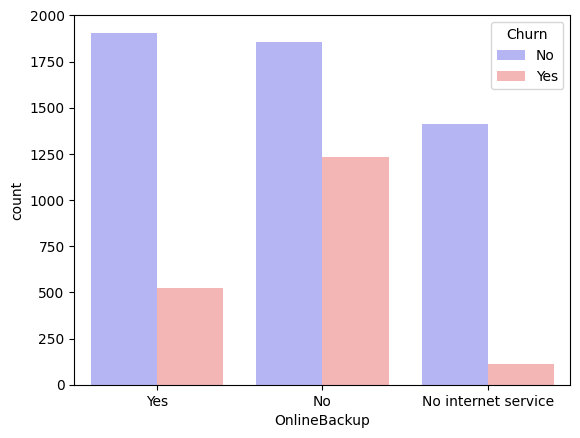

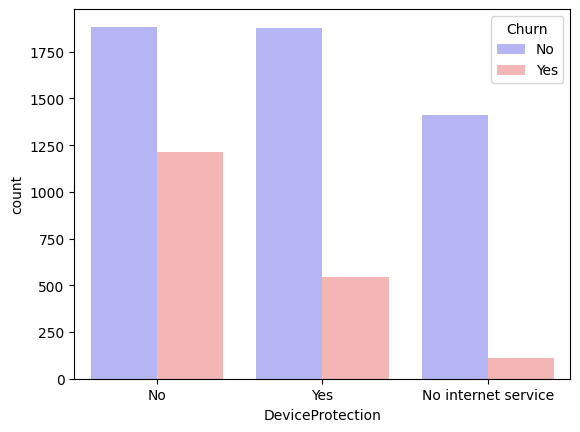

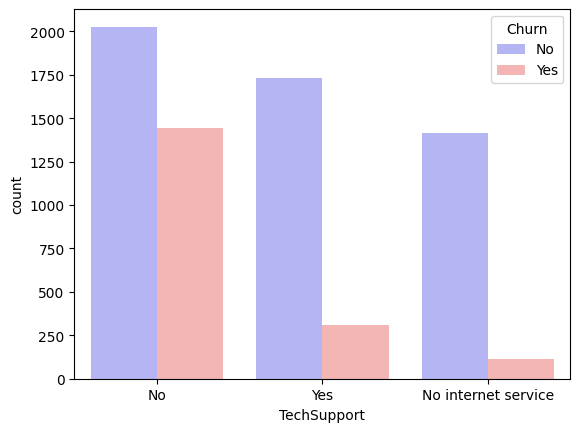

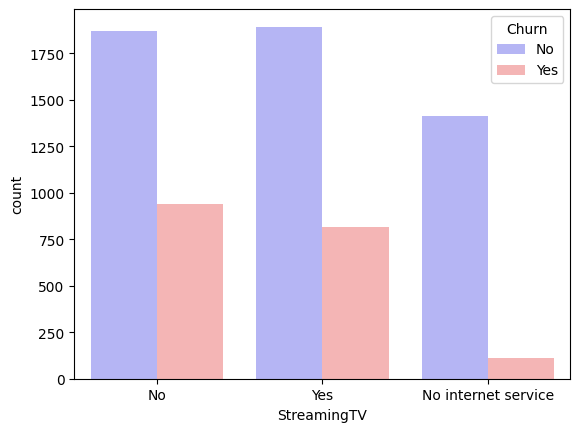

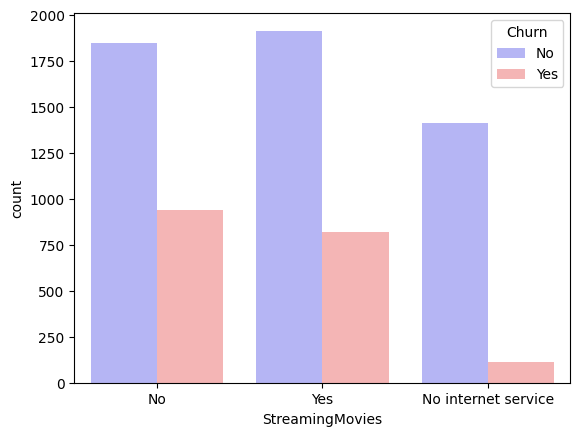

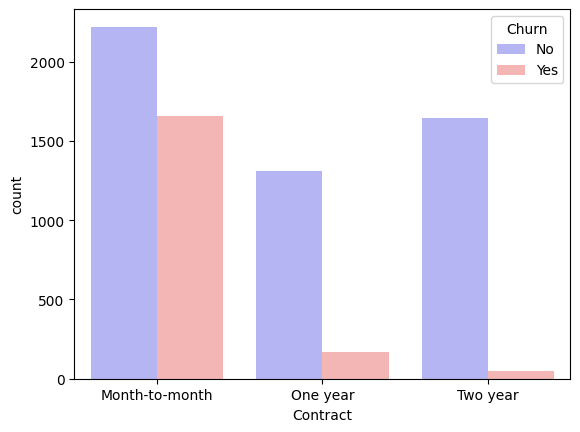

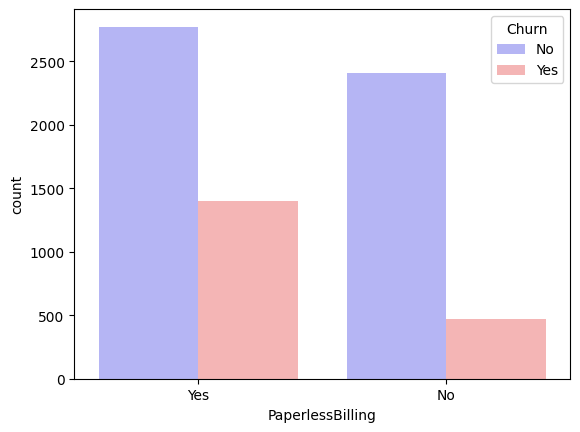

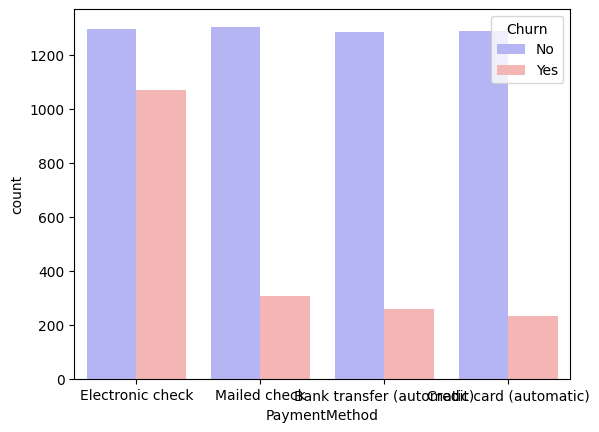

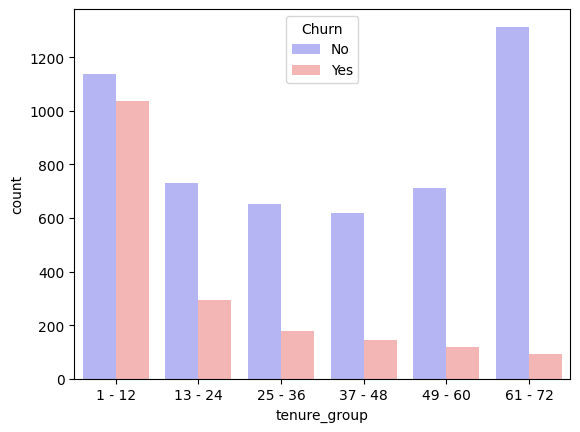

In [22]:
list = enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']))
lst=[]
for i, predictor in list:
    plt.figure(i)
    lst.append(sns.countplot(data=data, x=predictor, hue='Churn',palette='bwr'))
plt.show()

In [23]:
#ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin", split=True, palette="bwr", data=data)
#It's interesting how customers with DSL (slower connection) and higher charges are less probable to churn.


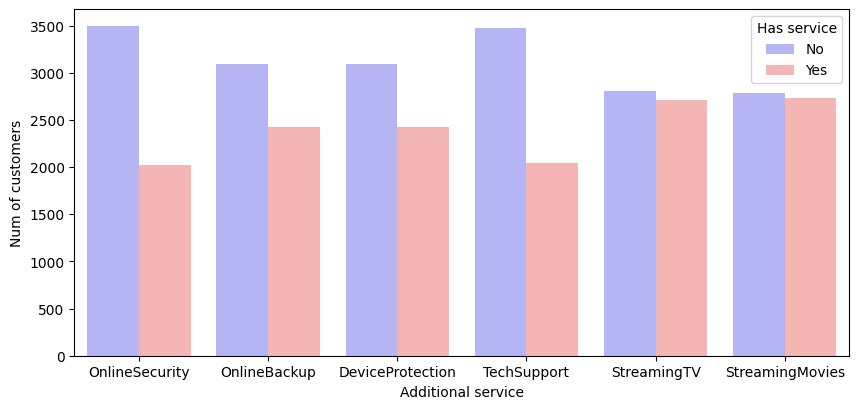

In [24]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
data1 = pd.melt(data[data["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=data1, x='variable', hue='Has service', palette="bwr")
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

#additional internet services like online security, online backup, device protection, tech support are not
#preferred by many users but user who have opted for these services show high retention rate from the above graphs
#hence the company has to focus on advertising these services to its customers to decrease the customer churn rate

In [25]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,True,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,True,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,True,False,False,True,True,False,False,False,False,False


<Axes: >

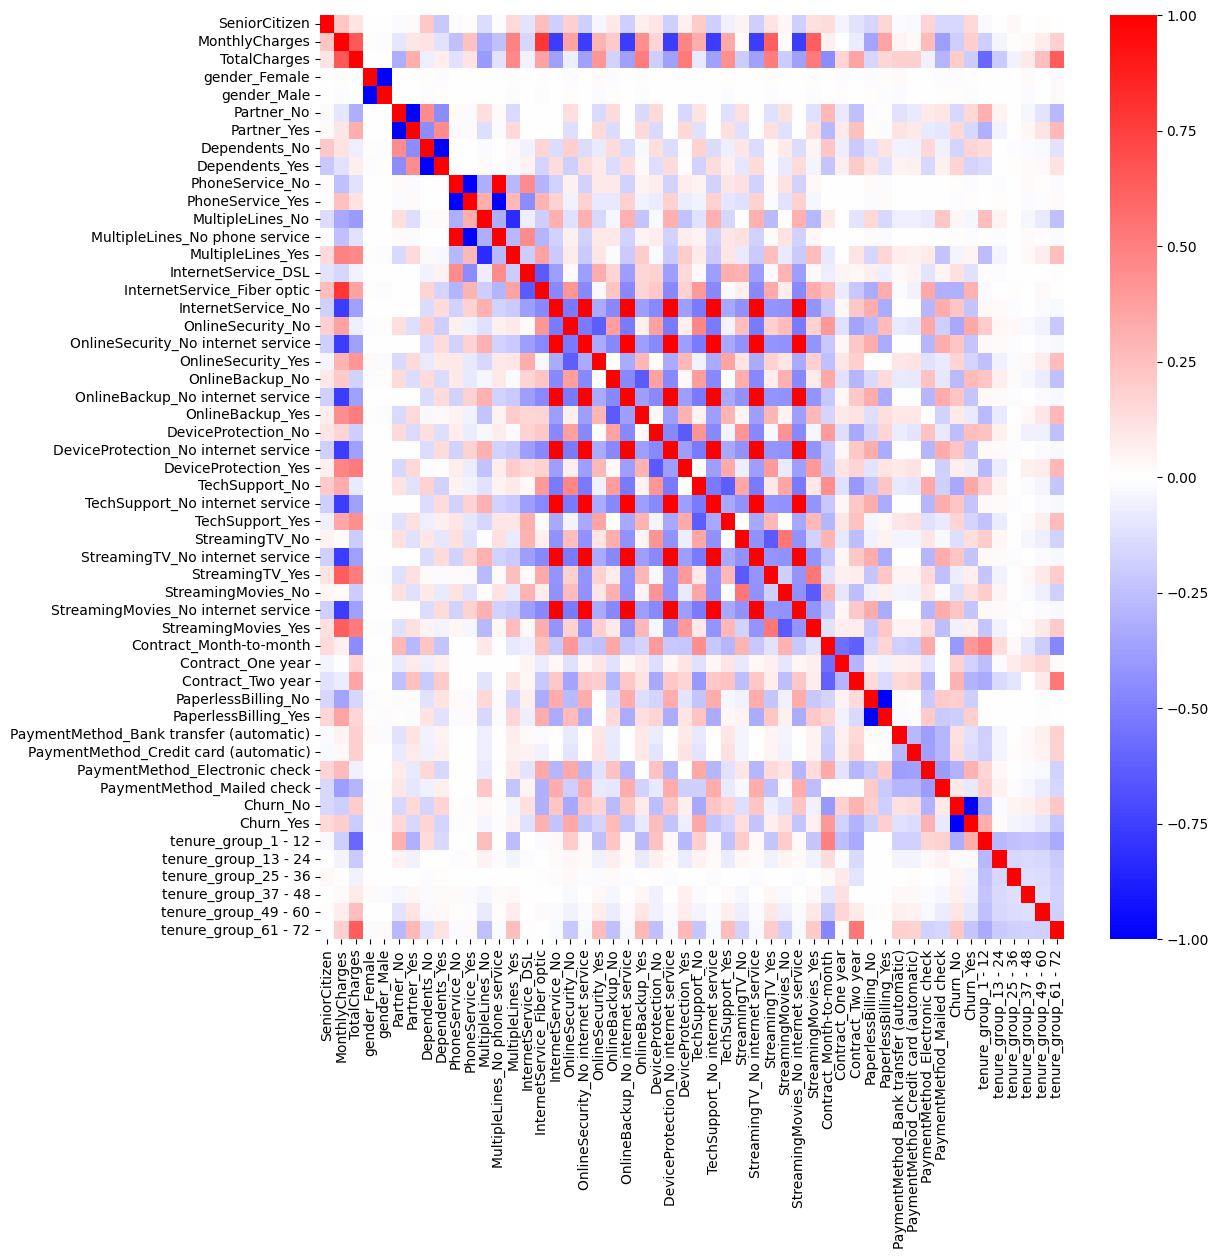

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(),cmap='bwr')


In [27]:
telco_data = data_dummies.copy()
telco_data

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,True,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,True,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,True,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,True,True,False,False,True,False,False,False,False
7039,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,True
7040,0,29.60,346.45,True,False,False,True,False,True,True,...,True,False,True,False,True,False,False,False,False,False
7041,1,74.40,306.60,False,True,False,True,True,False,False,...,False,True,False,True,True,False,False,False,False,False


In [28]:
input = telco_data.drop(['Churn_No','Churn_Yes'],axis=1)
input

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7039,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7040,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7041,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [29]:
output= data['Churn'].replace({'No': 0,'Yes': 1})
output

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

**Model Building**

In [30]:
input_train,input_test,output_train,output_test=train_test_split(input,output,test_size=0.2)

In [31]:
model_score_list1 = []

In [32]:
#before smoteenn
#DT
dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt.fit(input_train,output_train)
output_pred = dt.predict(input_test)
model_score_list1.append(dt.score(input_test,output_test))
dt.score(input_test,output_test)


0.7892122072391767

In [33]:
print(classification_report(output_test, output_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1020
           1       0.66      0.49      0.56       389

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [34]:
#RF
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
rf.fit(input_train,output_train)
output_pred=rf.predict(input_test)
model_score_list1.append(rf.score(input_test,output_test))
rf.score(input_test,output_test)


0.8041163946061036

In [35]:
print(classification_report(output_test, output_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1020
           1       0.70      0.51      0.59       389

    accuracy                           0.80      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [36]:
#SVM
rf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
rf.fit(input_train,output_train)
output_pred=rf.predict(input_test)
model_score_list1.append(rf.score(input_test,output_test))
rf.score(input_test,output_test)

0.7970191625266146

In [37]:
print(classification_report(output_test, output_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1020
           1       0.67      0.51      0.58       389

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [38]:
#KNN
rf = KNeighborsClassifier(n_neighbors=25)
rf.fit(input_train,output_train)
output_pred=rf.predict(input_test)
model_score_list1.append(rf.score(input_test,output_test))
rf.score(input_test,output_test)

0.7927608232789212

In [39]:
print(classification_report(output_test, output_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1020
           1       0.72      0.41      0.52       389

    accuracy                           0.79      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.78      0.79      0.77      1409



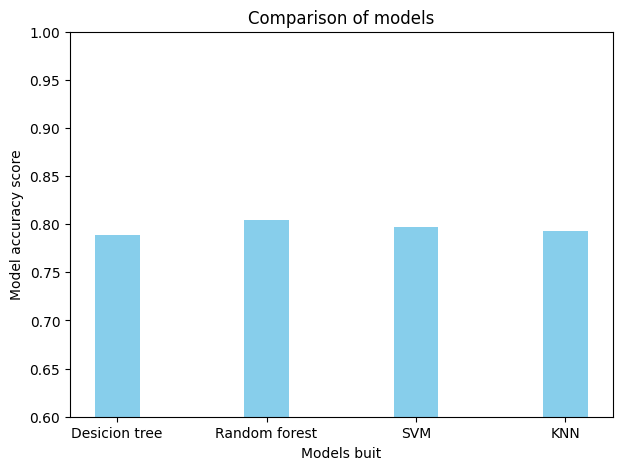

In [40]:
models = ['Desicion tree','Random forest','SVM','KNN']
fig = plt.figure(figsize = (7, 5))
#  Bar plot
plt.bar(models,model_score_list1, color ='skyblue',width = 0.3)
plt.ylim(0.6,1.0)
plt.xlabel("Models buit")
plt.ylabel("Model accuracy score")
plt.title("Comparison of models")
plt.show()

In [41]:
model_score_list2 = []

In [42]:
#after smoteenn
sm = SMOTEENN()
input_resampled, output_resampled = sm.fit_resample(input,output)
ir_train,ir_test,or_train,or_test=train_test_split(input_resampled, output_resampled,test_size=0.2)

In [43]:
#DT
dt_s=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt_s.fit(ir_train,or_train)
or_predict = dt_s.predict(ir_test)
model_score_r = dt_s.score(ir_test, or_test)
model_score_list2.append(model_score_r)
print(model_score_r)

0.927013422818792


In [44]:
print(classification_report(or_test, or_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       544
           1       0.92      0.95      0.93       648

    accuracy                           0.93      1192
   macro avg       0.93      0.92      0.93      1192
weighted avg       0.93      0.93      0.93      1192



In [45]:
#RF after SMOTEENN
rf_s=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
rf_s.fit(ir_train,or_train)
or_predict = rf_s.predict(ir_test)
model_score_r1 = rf_s.score(ir_test, or_test)
model_score_list2.append(model_score_r1)
print(model_score_r1)

0.9219798657718121


In [46]:
print(classification_report(or_test, or_predict))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       544
           1       0.90      0.96      0.93       648

    accuracy                           0.92      1192
   macro avg       0.93      0.92      0.92      1192
weighted avg       0.92      0.92      0.92      1192



In [47]:
#SVM after SMOTEENN
rf_s = make_pipeline(StandardScaler(), SVC(gamma='auto'))
rf_s.fit(ir_train,or_train)
or_predict = rf_s.predict(ir_test)
model_score_list2.append(rf_s.score(ir_test, or_test))
rf_s.score(ir_test, or_test)

0.924496644295302

In [48]:
print(classification_report(or_test, or_predict))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       544
           1       0.93      0.94      0.93       648

    accuracy                           0.92      1192
   macro avg       0.92      0.92      0.92      1192
weighted avg       0.92      0.92      0.92      1192



In [49]:
#KNN after SMOTEENN
rf_s = KNeighborsClassifier(n_neighbors=2)
rf_s.fit(ir_train,or_train)
or_predict = rf_s.predict(ir_test)
model_score_list2.append(rf_s.score(ir_test, or_test))
rf_s.score(ir_test, or_test)

0.9823825503355704

In [50]:
print(classification_report(or_test, or_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       544
           1       0.99      0.98      0.98       648

    accuracy                           0.98      1192
   macro avg       0.98      0.98      0.98      1192
weighted avg       0.98      0.98      0.98      1192



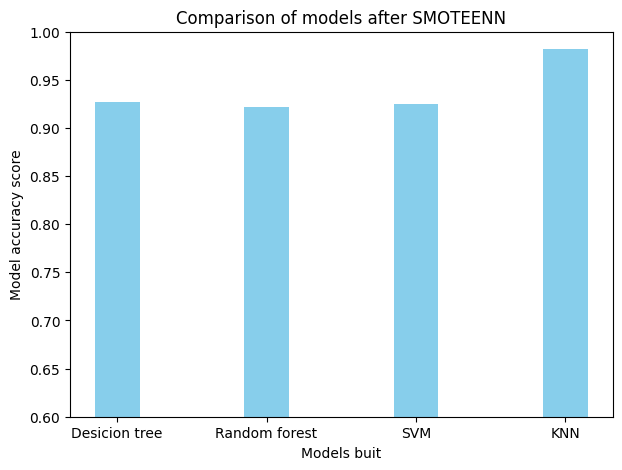

In [51]:
models = ['Desicion tree','Random forest','SVM','KNN']
fig = plt.figure(figsize = (7, 5))
#  Bar plot
plt.bar(models,model_score_list2, color ='skyblue',width = 0.3)
plt.ylim(0.6,1.0)
plt.xlabel("Models buit")
plt.ylabel("Model accuracy score")
plt.title("Comparison of models after SMOTEENN")
plt.show()

In [52]:
#feature impotrance
#confusion matrix

In [53]:
filename = 'model.sav'
pickle.dump(rf_s,open(filename,'wb'))

In [54]:
load_model = pickle.load(open(filename,'rb'))
model_score_r1 = load_model.score(ir_test, or_test)
model_score_r1

0.9823825503355704